In [5]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *

%matplotlib inline

In [6]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.0

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

In [12]:
T = 20
hs = np.linspace(0.005, 0.01, 4)

In [19]:
schemes = [EulerStep, EulerCromerStep, LeapfrogStep, RK4Step, PEFRLStep]
names = ['Explicit Euler', 'Symplectic Euler', 'Leapfrog', 'RK4', 'Forest-Ruth', 'Scipy']

all_E_maxes = []
for i, scheme in enumerate(schemes):
    E_maxes = []
    for h in hs:
        traj = run_scheme(scheme, 0, T, h, r0s, v0s, G, masses)
        t_traj, rs_traj, vs_traj, E_traj, am_traj, time = traj
        rel_E_traj = RelativeEnergy(E_traj)
        E_maxes.append(np.max(rel_E_traj))
    E_maxes = np.array(E_maxes) - E_maxes[0]
    all_E_maxes.append(E_maxes)

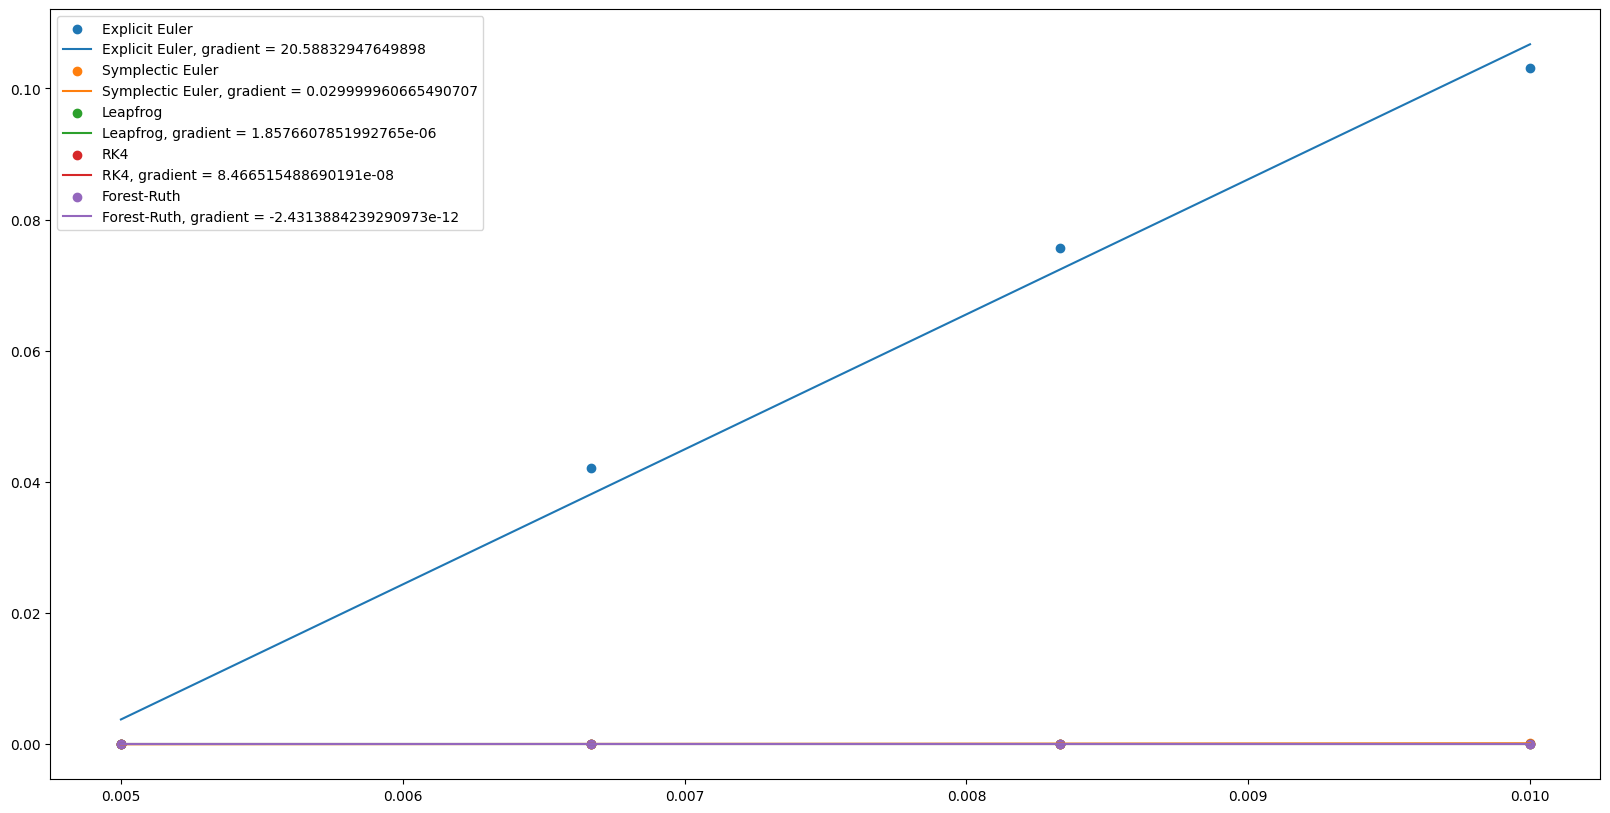

In [22]:
fig, ax = plt.subplots(1,1, figsize = (20,10))

for i, E_maxes in enumerate(all_E_maxes):
    a, b = np.polyfit(hs, E_maxes, 1)
    ax.scatter(hs, E_maxes, label = names[i])
    ax.plot(hs, a*hs + b, label = f'{names[i]}, gradient = {a}')

# ax.set_yscale('log')
ax.legend()